## **CNN**



In [7]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models, losses, optimizers
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

train_images, test_images = train_images / 255.0, test_images / 255.0

170500096/170498071 [==============================] - 2s 0us/step


In [3]:
train_images.shape, test_images.shape, train_labels.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1))

### **Architecture as given in the figure**

In [22]:
model = models.Sequential()

model.add(layers.ZeroPadding2D(padding=(1, 1), input_shape=(32, 32, 3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(10, activation='relu'))

model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_11 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 10)                81930     
Total params: 82,954
Trainable params: 82,890
Non-trainable params: 64
________________________________________________

In [23]:
opt = optimizers.SGD(learning_rate=0.02)
model.compile(optimizer=opt, loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 56s 36ms/step - loss: 1.8682 - accuracy: 0.3654 - val_loss: 1.4737 - val_accuracy: 0.4910
Epoch 2/10
1563/1563 [==============================] - 54s 35ms/step - loss: 1.1930 - accuracy: 0.5863 - val_loss: 1.5616 - val_accuracy: 0.4840
Epoch 3/10
1563/1563 [==============================] - 54s 34ms/step - loss: 1.0636 - accuracy: 0.6360 - val_loss: 1.3570 - val_accuracy: 0.5512
Epoch 4/10
1563/1563 [==============================] - 54s 34ms/step - loss: 0.9965 - accuracy: 0.6562 - val_loss: 1.1524 - val_accuracy: 0.6034
Epoch 5/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.9390 - accuracy: 0.6794 - val_loss: 1.8214 - val_accuracy: 0.4501
Epoch 6/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9025 - accuracy: 0.6900 - val_loss: 1.6083 - val_accuracy: 0.4949
Epoch 7/10
1563/1563 [==============================] - 54s 35ms/step - loss: 0.8621 - accuracy: 0.7060 - val_loss: 1.2760 -

### **(a) No Batch Normalization**

In [24]:
model2 = models.Sequential()

model2.add(layers.ZeroPadding2D(padding=(1, 1), input_shape=(32, 32, 3)))
model2.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Flatten())
model2.add(layers.Dense(10, activation='relu'))

model2.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_12 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                81930     
Total params: 82,826
Trainable params: 82,826
Non-trainable params: 0
_________________________________________________________________


In [25]:
opt = optimizers.SGD(learning_rate=0.02)
model2.compile(optimizer=opt, loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 37s 24ms/step - loss: 2.2158 - accuracy: 0.1931 - val_loss: 1.9231 - val_accuracy: 0.3255
Epoch 2/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.8628 - accuracy: 0.3475 - val_loss: 1.6917 - val_accuracy: 0.4263
Epoch 3/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.6175 - accuracy: 0.4491 - val_loss: 1.4907 - val_accuracy: 0.4859
Epoch 4/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.4628 - accuracy: 0.4995 - val_loss: 1.3809 - val_accuracy: 0.5027
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2853 - accuracy: 0.5528 - val_loss: 1.3991 - val_accuracy: 0.5126
Epoch 6/10
1563/1563 [==============================] - 36s 23ms/step - loss: 1.2266 - accuracy: 0.5715 - val_loss: 1.3071 - val_accuracy: 0.5271
Epoch 7/10
1563/1563 [==============================] - 37s 23ms/step - loss: 1.1810 - accuracy: 0.5917 - val_loss: 1.2806 -

### **(b) Two Dense Layers**

In [26]:
model3 = models.Sequential()

model3.add(layers.ZeroPadding2D(padding=(1, 1), input_shape=(32, 32, 3)))
model3.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dense(10))

model3.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_13 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 8192)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                524352    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                650       
Total params: 525,898
Trainable params: 525,898
Non-trainable params: 0
_______________________________________________

In [27]:
opt = optimizers.SGD(learning_rate=0.02)
model3.compile(optimizer=opt, loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.9938 - accuracy: 0.2753 - val_loss: 1.5201 - val_accuracy: 0.4640
Epoch 2/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.4905 - accuracy: 0.4701 - val_loss: 1.4075 - val_accuracy: 0.4867
Epoch 3/10
1563/1563 [==============================] - 42s 27ms/step - loss: 1.2944 - accuracy: 0.5424 - val_loss: 1.4543 - val_accuracy: 0.4987
Epoch 4/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1885 - accuracy: 0.5854 - val_loss: 1.1744 - val_accuracy: 0.5849
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.1229 - accuracy: 0.6054 - val_loss: 1.1364 - val_accuracy: 0.6003
Epoch 6/10
1563/1563 [==============================] - 41s 26ms/step - loss: 1.0283 - accuracy: 0.6404 - val_loss: 1.1091 - val_accuracy: 0.6031
Epoch 7/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.9708 - accuracy: 0.6596 - val_loss: 1.2234 -

### **(c) 2 Blocks of Conv2D -> BatchNorm2D -> MaxPooling2D**

In [38]:
model4 = models.Sequential()

model4.add(layers.ZeroPadding2D(padding=(1, 1), input_shape=(32, 32, 3)))

model4.add(layers.Conv2D(32, (3, 3), activation='relu'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model4.add(layers.BatchNormalization())
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Flatten())
model4.add(layers.Dense(10, activation='relu'))

model4.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_21 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_27 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_28 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 8, 8, 64)        

In [32]:
opt = optimizers.SGD(learning_rate=0.02)
model4.compile(optimizer=opt, loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history4 = model4.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 100s 64ms/step - loss: 2.0479 - accuracy: 0.2980 - val_loss: 1.7398 - val_accuracy: 0.4634
Epoch 2/10
1563/1563 [==============================] - 99s 63ms/step - loss: 1.3227 - accuracy: 0.5811 - val_loss: 1.3085 - val_accuracy: 0.5739
Epoch 3/10
1563/1563 [==============================] - 98s 63ms/step - loss: 1.0098 - accuracy: 0.6642 - val_loss: 1.0658 - val_accuracy: 0.6503
Epoch 4/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.8708 - accuracy: 0.7049 - val_loss: 1.0591 - val_accuracy: 0.6390
Epoch 5/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.7910 - accuracy: 0.7299 - val_loss: 1.0576 - val_accuracy: 0.6415
Epoch 6/10
1563/1563 [==============================] - 99s 63ms/step - loss: 0.7475 - accuracy: 0.7469 - val_loss: 1.1200 - val_accuracy: 0.6370
Epoch 7/10
1563/1563 [==============================] - 98s 63ms/step - loss: 0.7037 - accuracy: 0.7594 - val_loss: 0.9878 

### **(d) 3 Blocks of Conv2D -> BatchNorm2D -> MaxPooling2D**

In [35]:
model5 = models.Sequential()

model5.add(layers.ZeroPadding2D(padding=(1, 1), input_shape=(32, 32, 3)))

model5.add(layers.Conv2D(32, (3, 3), activation='relu'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(64, (3, 3), activation='relu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(32, (3, 3), activation='relu', padding = 'same'))
model5.add(layers.BatchNormalization())
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Flatten())
model5.add(layers.Dense(10, activation='relu'))

model5.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_19 (ZeroPaddi (None, 34, 34, 3)         0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_22 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_23 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 8, 8, 64)        

In [36]:
opt = optimizers.SGD(learning_rate=0.02)
model5.compile(optimizer=opt, loss=losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history5 = model5.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 128s 82ms/step - loss: 1.8676 - accuracy: 0.3598 - val_loss: 1.6905 - val_accuracy: 0.4623
Epoch 2/10
1563/1563 [==============================] - 125s 80ms/step - loss: 1.1492 - accuracy: 0.6024 - val_loss: 1.2813 - val_accuracy: 0.5679
Epoch 3/10
1563/1563 [==============================] - 123s 79ms/step - loss: 0.9565 - accuracy: 0.6677 - val_loss: 1.3648 - val_accuracy: 0.5635
Epoch 4/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.8663 - accuracy: 0.7021 - val_loss: 0.9969 - val_accuracy: 0.6654
Epoch 5/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.7985 - accuracy: 0.7247 - val_loss: 1.2450 - val_accuracy: 0.5935
Epoch 6/10
1563/1563 [==============================] - 127s 81ms/step - loss: 0.7512 - accuracy: 0.7423 - val_loss: 1.0168 - val_accuracy: 0.6444
Epoch 7/10
1563/1563 [==============================] - 125s 80ms/step - loss: 0.7178 - accuracy: 0.7502 - val_loss: 1

### **Performances of various models**

In [44]:
from prettytable import PrettyTable
l = [["Same as Figure", history.history['accuracy'][-1], history.history['val_accuracy'][-1], history.history['loss'][-1], history.history['val_loss'][-1]],
     ["No Batch Norm.", history2.history['accuracy'][-1], history2.history['val_accuracy'][-1], history2.history['loss'][-1], history2.history['val_loss'][-1]],
     ["Two Dense Layers", history3.history['accuracy'][-1], history3.history['val_accuracy'][-1], history3.history['loss'][-1], history3.history['val_loss'][-1]],
     ["2 Blocks of Conv2d...", history4.history['accuracy'][-1], history4.history['val_accuracy'][-1], history4.history['loss'][-1], history4.history['val_loss'][-1]],
     ["3 Blocks of Conv2d...", history5.history['accuracy'][-1], history5.history['val_accuracy'][-1], history5.history['loss'][-1], history5.history['val_loss'][-1]]
     ]

table = PrettyTable(['Model','Train Accuracy', 'Test Accuracy', 'Train loss', 'Test loss'])
for rec in l:
    table.add_row(rec)
print(table)

+-----------------------+--------------------+--------------------+--------------------+--------------------+
|         Model         |   Train Accuracy   |   Test Accuracy    |     Train loss     |     Test loss      |
+-----------------------+--------------------+--------------------+--------------------+--------------------+
|     Same as Figure    | 0.7214800119400024 | 0.6119999885559082 | 0.8108803033828735 | 1.1816813945770264 |
|     No Batch Norm.    | 0.6186599731445312 | 0.5568000078201294 | 1.098501205444336  | 1.239728569984436  |
|    Two Dense Layers   | 0.7057399749755859 | 0.6029999852180481 | 0.8413252830505371 | 1.177137851715088  |
| 2 Blocks of Conv2d... | 0.7885000109672546 | 0.5666999816894531 | 0.6242680549621582 | 1.406472086906433  |
| 3 Blocks of Conv2d... | 0.7796199917793274 | 0.6707000136375427 | 0.6326614618301392 | 0.9992107152938843 |
+-----------------------+--------------------+--------------------+--------------------+--------------------+


Best model comes out to be the last one. i.e. 3 Blocks of Conv2D -> BatchNorm2D -> MaxPooling2D

**Accuracy vs Epochs for the best model**

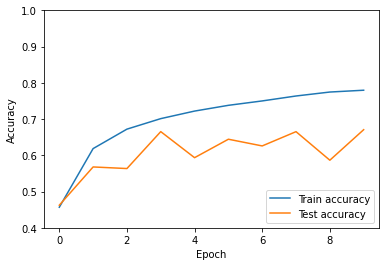

In [48]:
plt.plot(history5.history['accuracy'], label='Train accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Test accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.legend(loc='lower right')